<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%203/Taller%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

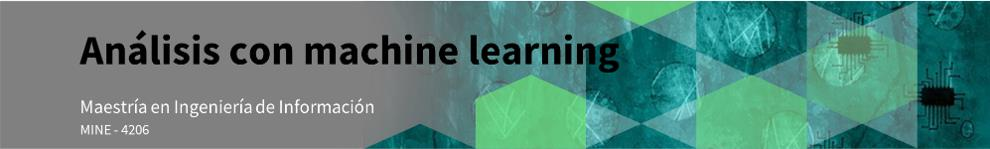

- **Integrante 1:** Lina María Gómez Mesa
- **Integrante 2:** María Catalina Ibáñez Piñeres

---
# Contexto y objetivos.

En la actualidad, la cantidad de artículos publicados en Internet está generando una gran ola de información accesible por cualquier usuario, dando a conocer diferentes puntos de vista, opiniones, información e investigaciones sobre diferentes temas de interés.

Esta gran cantidad de información no solo permite una búsqueda exhaustiva sobre un tema, también permite realizar un análisis sobre la tendencia de los diferentes temas que estén dando de qué hablar en una sociedad. Es por ello que un grupo de expertos se ha dado la tarea de analizar 10.000 artículos web y clasificarlos para poder establecer un análisis de los temas en la actualidad.

Para ello, como experto en análisis con machine learning, le han pedido que construya un modelo capaz de clasificar los nuevos artículos, realice un análisis de cuáles son los temas que dan de que hablar y automatice el proceso de selección y búsqueda de diferentes artículos.

**Objetivos de desarrollo**:

* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en una red neuronal.

**Datos**: La fuente de los datos la puedes encontrar en [News Articles Classification Dataset for NLP & ML](https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml).

# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **headlines** | Titular del artículo.|
| **description** | Reseña del artículo.|
| **content** | Contenido del artículo.|
| **url** | Dirección web del artículo.|
| **category** | Representa la temática del artículo.|

# Actividades a realizar.

1. Realizar el análisis exploratorio de componentes principales en la información.

2. Identificar el número de componentes principales apropiado el procesamiento. Genera una tabla comparativa y los gráficos que apoyen este proceso. Recuerda que no deben truncarse los textos. Por último, la elección del número de componentes debe estar debidamente justificada.

3. Construir la red neuronal tomando como insumo los componentes principales procesados en el punto anterior.

4. Construir las gráficas de entrenamiento, validación. Debes interpretar los resultados obtenidos para este modelo base.

5. Realizar la identificación de hiperparámetros, justificando la elección de los valores correspondientes.

**NOTA**: La calificación será sobre notebook ejecutado y cargado en Bloque Neón junto con el archivo HTML.

# 0. Importar librerías

In [1]:
#Manejo de datos
import pandas as pd
import numpy as np
import scipy

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos

from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Textos

import contractions
import inflect
import nltk
import re, string, unicodedata
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from polyglot.detect import Detector
from wordcloud import WordCloud, STOPWORDS

#Tensorflow y keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Sistema operativo
import os
import os.path as osp

#Librerías extras
import itertools
from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")
print(f'La versión de Tensor Flow es:', tf.__version__)

/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


La versión de sklearn es: 1.4.2
La versión de Tensor Flow es: 2.16.1


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/mariacatalinaibanezpineres/nltk_data...
[n

True

# 1. Introducción a los datos

## 1.1. Configuración del entorno de kaggle

Se hace la conexión con kaggle para poder descargar la base de datos.

In [3]:
!ls -lha kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r--@ 1 mariacatalinaibanezpineres  staff    75B Apr 12 09:57 kaggle.json
mkdir: /Users/mariacatalinaibanezpineres/.kaggle: File exists


Se verifica la conectividad con el entorno de kaggle.

In [4]:
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                           Online Food Dataset                               3KB  2024-03-02 18:50:30          25567        502  0.9411765        
nbroad/gemma-rewrite-nbroad                                   gemma-rewrite-nbroad                              8MB  2024-03-03 04:52:39           1610        101  1.0              
sukhmandeepsinghbrar/most-subscribed-youtube-channel          Most Subscribed YouTube Channel                   1KB  2024-04-10 20:33:05            928         31  1.0              
sanyamgoyal401/customer-purchases-behaviour-dataset           Customer Purchases Behaviour

Se descarga la base de datos.

In [5]:
!kaggle datasets download banuprakashv/news-articles-classification-dataset-for-nlp-and-ml

Dataset URL: https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml
License(s): Apache 2.0
news-articles-classification-dataset-for-nlp-and-ml.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
ROOT_DIR = 'content'
DATASET_NAME = 'news-articles-classification-dataset-for-nlp-and-ml'

In [7]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip news-articles-classification-dataset-for-nlp-and-ml.zip -d content/news-articles-classification-dataset-for-nlp-and-ml


Se descomprime el archivo en una carpeta previamente creada llamada content

In [8]:
#%cd {ROOT_DIR}
!mkdir content
!mkdir content/{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

mkdir: content: File exists


mkdir: content/news-articles-classification-dataset-for-nlp-and-ml: File exists
Archive:  news-articles-classification-dataset-for-nlp-and-ml.zip
replace content/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Se genera la ruta del directorio para cargar la información.

In [3]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)

content/news-articles-classification-dataset-for-nlp-and-ml


## 1.2. Separación de la información.

Se listan los archivos dentro de la carpeta

In [4]:
csv_files = os.listdir(DATA_DIR)

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for csv_file in csv_files:
  new_df = pd.read_csv(osp.join(DATA_DIR, csv_file))
  train, test = train_test_split(new_df, test_size=0.2, random_state=19)
  train_df = pd.concat([train_df, train])
  test_df = pd.concat([test_df, test])

train_df.sample(5)

headlines  \
1004  Sandeep Reddy Vanga reveals why he removed ‘su...   
774   Discord Shop lets you purchase new items to en...   
1407  Shakira set to release new song on her and Ger...   
1623  As Centre invites private hospitals to begin m...   
1065  Dunki Release Date: Shah Rukh Khan’s film budg...   

                                            description  \
1004  Animal director Sandeep Reddy Vanga explained ...   
774   Discord has added a new 'Shop' tab to the app ...   
1407  Shakira made a huge sum of money from an earli...   
1623  While some believe that mushrooming of private...   
1065  Shah Rukh Khan's Dunki Release Date: The film ...   

                                                content  \
1004  Actor Bobby Deol recently revealed that the fi...   
774   Discord, the popular instant messaging and voi...   
1407  Shakira will release a new track on her and no...   
1623  Union Health Minister Mansukh Mandaviya recent...   
1065  Shah Rukh Khan’s Movie Dunki Release Date: The...   

                                                    url       category  
1004  https://indianexpress.com/article/entertainmen...  entertainment  
774   https://indianexpress.com/article/technology/t...     technology  
1407  https://indianexpress.com/article/sports/footb...         sports  
1623  https://indianexpress.com/article/education/ce...      education  
1065  https://indianexpress.com/article/entertainmen...  entertainment

Se mira el número de instancias para cada uno de los conjuntos de datos.

In [5]:
train_count = train_df.shape[0]
test_count = test_df.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 8,000
-> Test: 2,000


Se verifican las categorías

In [6]:
train_df["category"].value_counts()

category
entertainment    1600
education        1600
business         1600
technology       1600
sports           1600
Name: count, dtype: int64

In [7]:
test_df["category"].value_counts()

category
entertainment    400
education        400
business         400
technology       400
sports           400
Name: count, dtype: int64

Se definen las variables X e Y para el modelo

In [8]:
target_feature = 'category'

In [9]:
x_feature = 'content'

Se genera una copia de la información para no modificar la original para el proceso exploratorio de transformación de los datos:

In [10]:
X_train_trans = train_df.copy()
X_train_trans

headlines  \
636   Rajinikanth fan mocks Vijay starrer The Greate...   
161   Agastya Nanda says he probably didn’t deserve ...   
855   Malaikottai Valiban new poster out: Mohanlal i...   
24    Hanu Man actor Teja Sajja on the responsibilit...   
252   Arun Matheswaran: ‘Captain Miller is my least ...   
...                                                 ...   
936   Women’s World Cup: Deepti Sharma, Richa Ghosh ...   
1378  Former state-level Punjab hockey player lifts ...   
757   ‘I told Babar Azam and Saqlain Mushtaq to drop...   
622   Watch: RB Leipzig’s Benjamin Henrichs’ handbal...   
1629           Asia Cup set to be moved out of Pakistan   

                                            description  \
636   A Rajinikanth fan shared a poster of Will Smit...   
161   Agastya Nanda also revealed why he did not fee...   
855   Lijo Jose Pellissery and Mohanlal have been ti...   
24    Teja Sajja and Prasanth Varma's Hanu Man has p...   
252   Arun Matheswaran calls Dhanush one of the shar...   
...                                                 ...   
936   Windies slump to 15th straight loss, eighth su...   
1378  Kumar, who was part of Sports Authority of Ind...   
757   Rizwan claimed in an interview to Cricket Paki...   
622   The incident occurred late in the game after L...   
1629  UAE could be the venue; BCCI ok with PCB hosti...   

                                                content  \
636   Director Venkat Prabhu has never shied away fr...   
161   Actor Agastya Nanda, who was recently seen in ...   
855   If Kalki AD 2989 is the next big thing in the ...   
24    Actor Teja Sajja’s mythological film Hanu Man,...   
252   Speaking at the audio launch of Captain Miller...   
...                                                 ...   
936   With four needed to win, Richa Ghosh lined up ...   
1378  He stands out like a sore thumb, as for some i...   
757   Interesting developments across the border in ...   
622   RB Leipzig’s Benjamin Henrichs’ handball incid...   
1629  The Board of Control for Cricket in India (BCC...   

                                                    url       category  
636   https://indianexpress.com/article/entertainmen...  entertainment  
161   https://indianexpress.com/article/entertainmen...  entertainment  
855   https://indianexpress.com/article/entertainmen...  entertainment  
24    https://indianexpress.com/article/entertainmen...  entertainment  
252   https://indianexpress.com/article/entertainmen...  entertainment  
...                                                 ...            ...  
936   https://indianexpress.com/article/sports/crick...         sports  
1378  https://indianexpress.com/article/sports/forme...         sports  
757   https://indianexpress.com/article/sports/crick...         sports  
622   https://indianexpress.com/article/sports/footb...         sports  
1629  https://indianexpress.com/article/sports/crick...         sports  

[8000 rows x 5 columns]

## 1.3. Exploración de los datos

Se va a generar un `WordCloud` para visualizar las palabras más frecuentes en las categorías.

Se inicia definiendo una función:

In [11]:
def show_wordcloud(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Se genera el llamada para cada una de las clases:

---------- Words for class: entertainment ----------


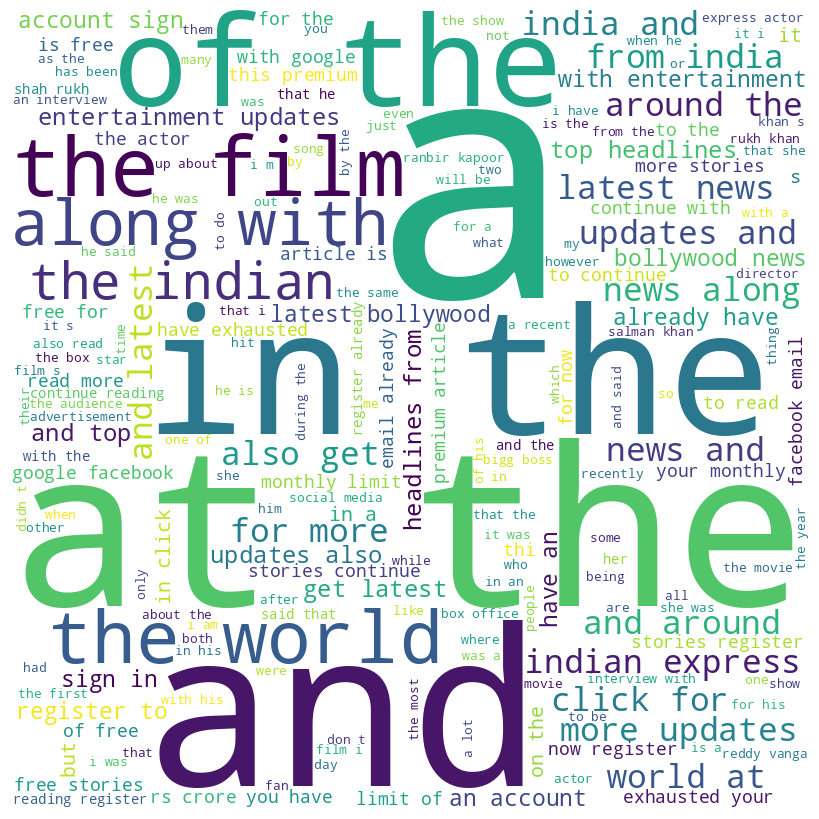

---------- Words for class: education ----------


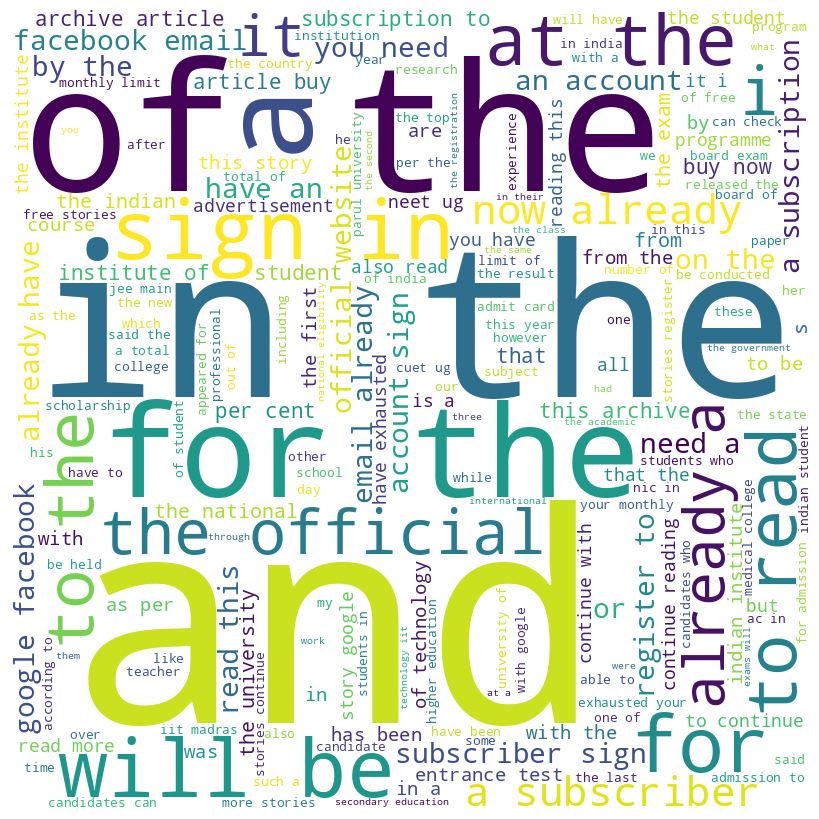

---------- Words for class: business ----------


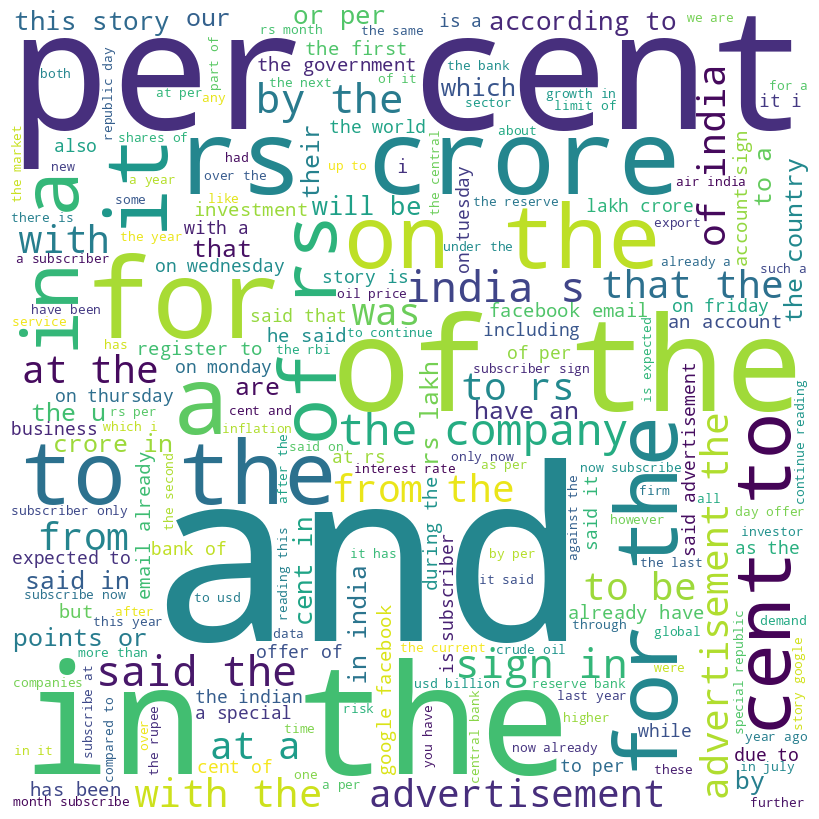

---------- Words for class: technology ----------


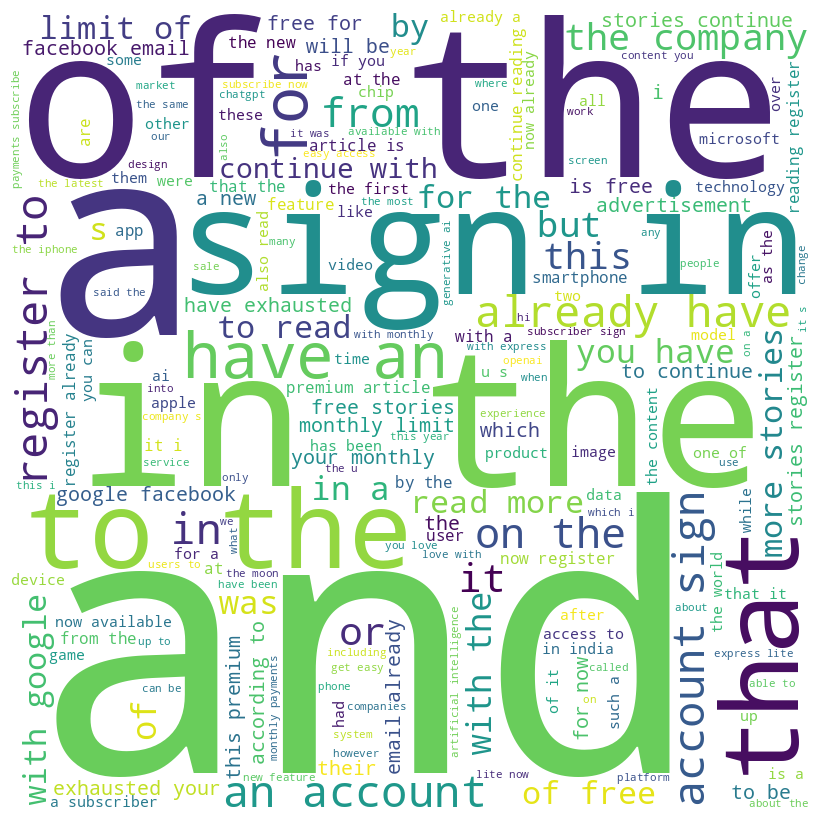

---------- Words for class: sports ----------


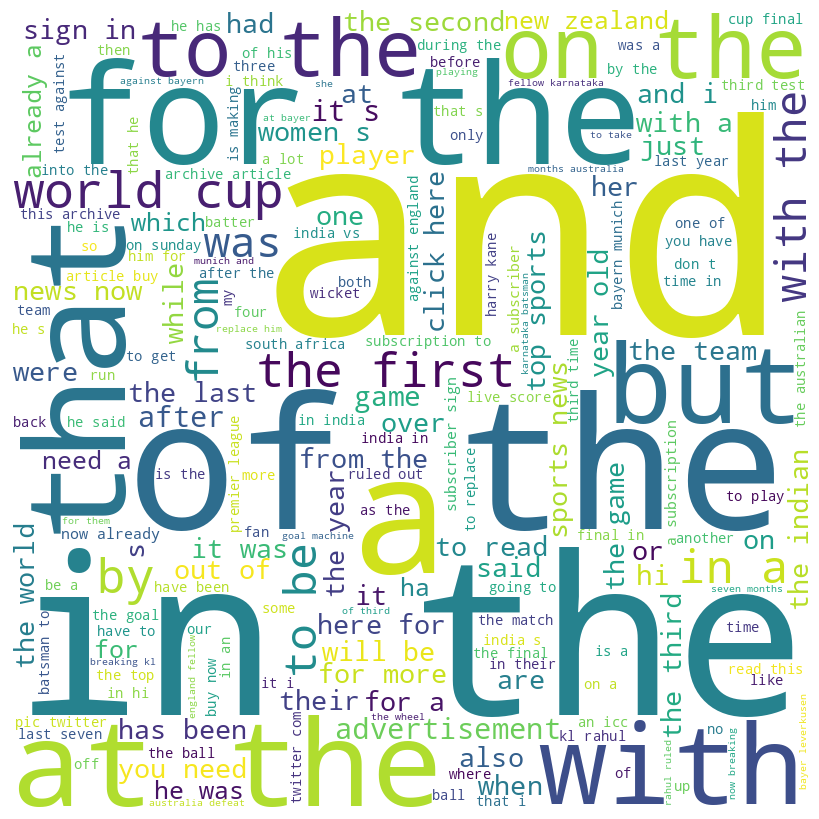

In [12]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature])

Como se puede ver, hay varias palabras que se repiten en las diferentes categorías, lo que puede generar ruido en el modelo, ya que no aportan mucha información, esas palabras se conocen como `stopwords`. Se va a proceder a eliminarlas y a realizar un nuevo `WordCloud` para visualizar las palabras más frecuentes en las categorías.

In [13]:
stop_words = stopwords.words('english')

---------- Words for class: entertainment ----------


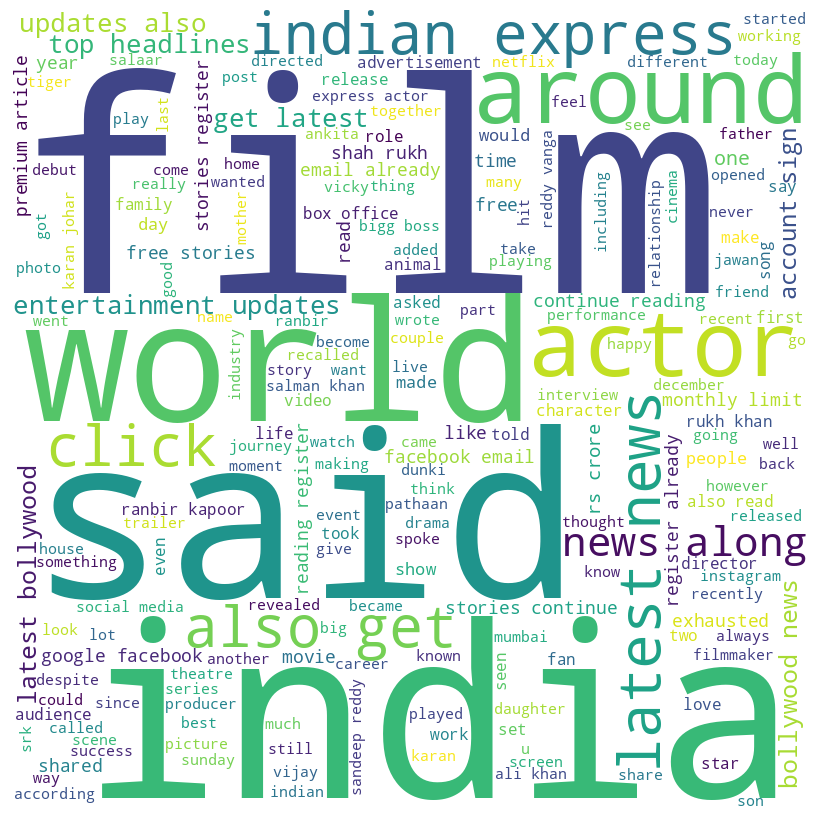

---------- Words for class: education ----------


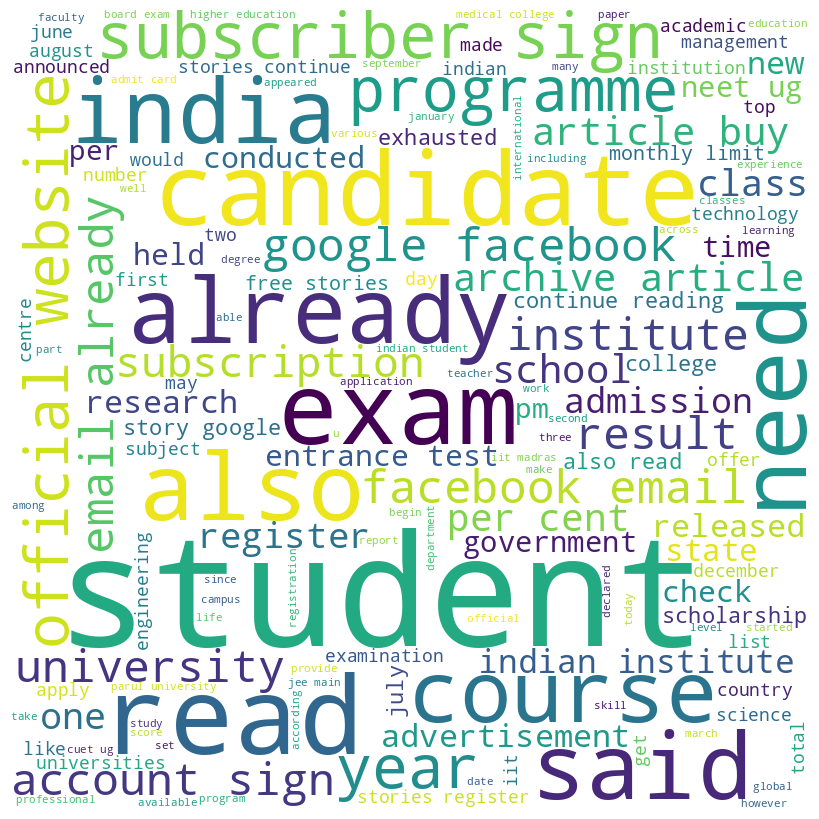

---------- Words for class: business ----------


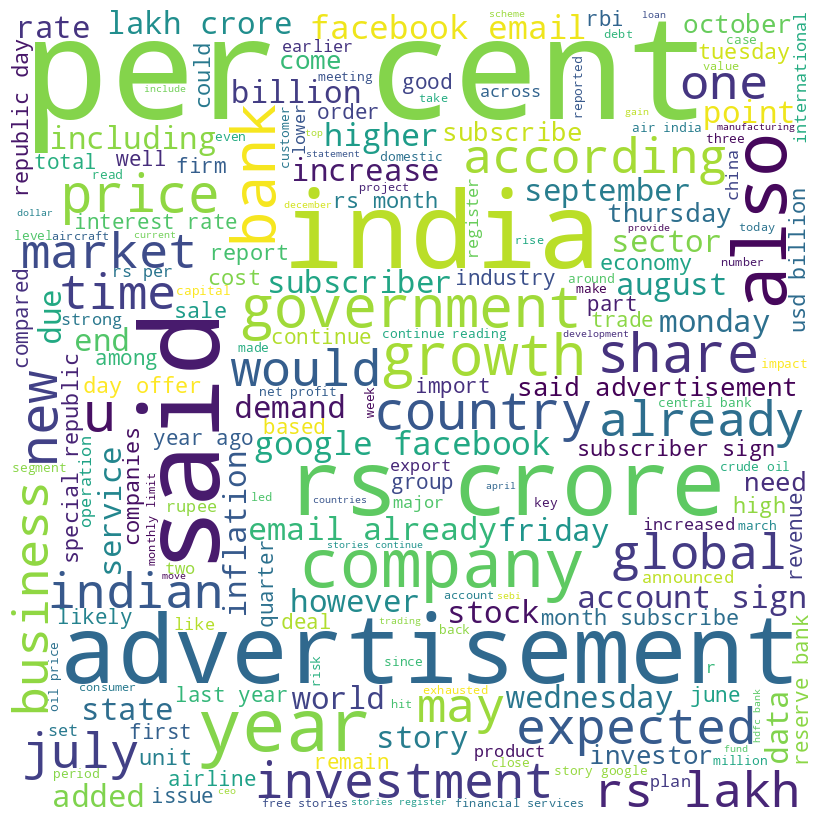

---------- Words for class: technology ----------


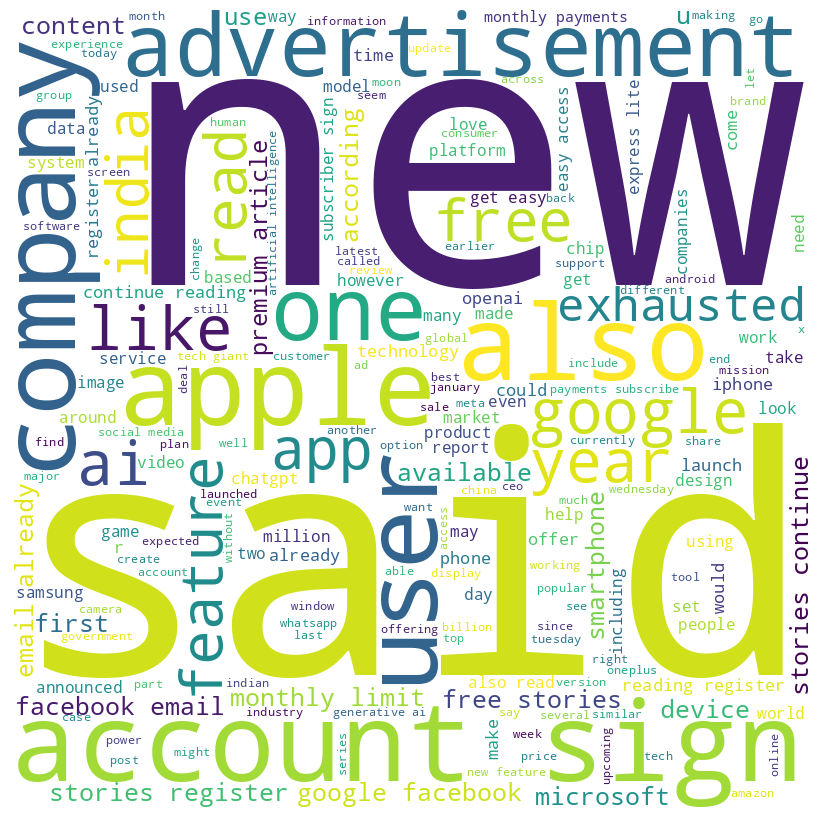

---------- Words for class: sports ----------


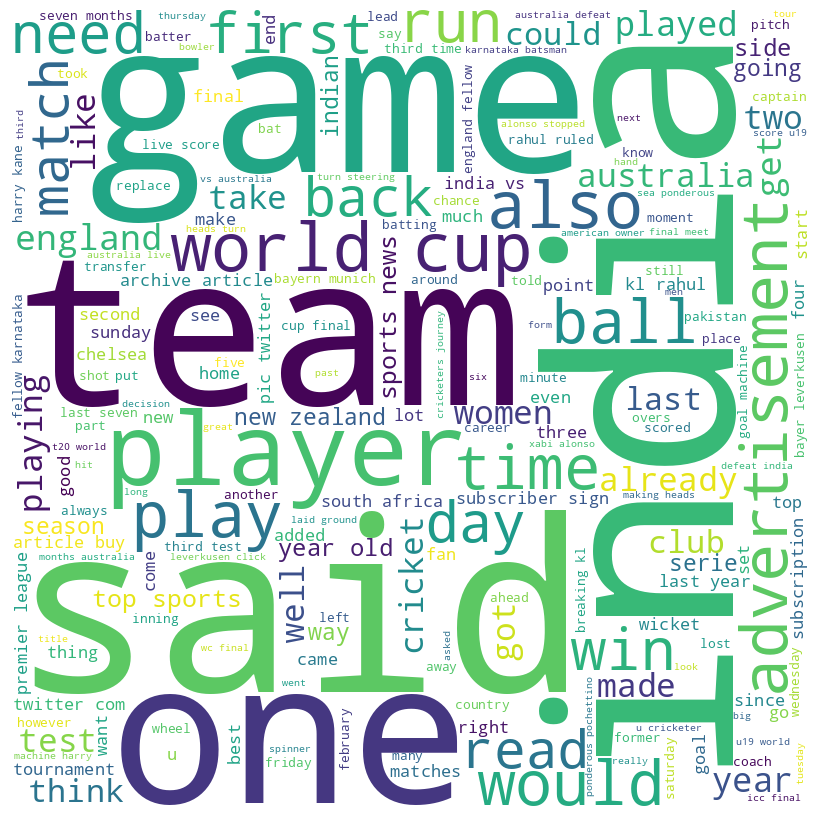

In [14]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature], stop_words)

Asimismo, es importante revisar que todas las palabras se encuentren en el mismo idioma dado que este proceso es sensible al idioma. Para ello, se toma la función _set_language_ la cual utiliza la librería polyglot para reconocer en qué idioma se encuentra la mayoría de las filas. El resultado es que la mayoría se encuentra en: **inglés**.

In [15]:
import cld2

def set_language(val):
    # Remove invalid UTF-8 characters
    cleaned_text = val.encode('utf-8', 'ignore').decode('utf-8')
    
    # Detect language
    reliable, _, top_3_choices = cld2.detect(cleaned_text, bestEffort=False)
    if reliable:
        return top_3_choices[0][1].lower()
    else:
        return 'unknown'

train_df["language"] = train_df[x_feature].apply(set_language)
print(f"El lenguaje predominante es: {train_df['language'].unique()[0]}")


El lenguaje predominante es: en


**Nota**: Dado que el único que lenguaje que aparece es inglés no se eliminan registros.

## 1.4. Preparación de la información

Inicialmente, se separa tanto la variable objetivo como la variable independiente. Además, se convierte los valores targets en valores numéricos para que sean entendibles por el algoritmo.

In [16]:
label_encoder = LabelEncoder()
train_df[target_feature] = label_encoder.fit_transform(train_df[target_feature])
test_df[target_feature] = label_encoder.fit_transform(test_df[target_feature])

unique_labels = label_encoder.classes_
for num_value, original_label in enumerate(unique_labels):
    print(f'Valor numérico: {num_value}, Etiqueta original: {original_label}')

Valor numérico: 0, Etiqueta original: business
Valor numérico: 1, Etiqueta original: education
Valor numérico: 2, Etiqueta original: entertainment
Valor numérico: 3, Etiqueta original: sports
Valor numérico: 4, Etiqueta original: technology


Se realiza separación de _train_:

In [17]:
X_train, Y_train = train_df[x_feature], train_df[target_feature]
display(X_train)
Y_train

636     Director Venkat Prabhu has never shied away fr...
161     Actor Agastya Nanda, who was recently seen in ...
855     If Kalki AD 2989 is the next big thing in the ...
24      Actor Teja Sajja’s mythological film Hanu Man,...
252     Speaking at the audio launch of Captain Miller...
                              ...                        
936     With four needed to win, Richa Ghosh lined up ...
1378    He stands out like a sore thumb, as for some i...
757     Interesting developments across the border in ...
622     RB Leipzig’s Benjamin Henrichs’ handball incid...
1629    The Board of Control for Cricket in India (BCC...
Name: content, Length: 8000, dtype: object

636     2
161     2
855     2
24      2
252     2
       ..
936     3
1378    3
757     3
622     3
1629    3
Name: category, Length: 8000, dtype: int64

Se realiza separación de _test_:

In [18]:
X_test, Y_test = test_df[x_feature], test_df[target_feature]
display(X_test)
Y_test

321     The Internet Movie Database (IMDb) has unveile...
1775    TV actors Divyanka Tripathi and Vivek Dahiya m...
953     Director Jude Anthany Joseph took to social me...
529     Deepika Padukone has always said that she and ...
1878    Actor Mansoor Ali Khan’s offensive and misogyn...
                              ...                        
1006    Chess Grandmaster Alireza Firouzja, the Irania...
1272    India vs New Zealand (IND vs NZ) 3rd T20I: Ind...
1497    Indian wicket-keeper batter Dinesh Karthik bel...
1756    Sania Mirza-Rohan Bopanna, Australian Open Mix...
921     Should Australia play with two spinners or go ...
Name: content, Length: 2000, dtype: object

321     2
1775    2
953     2
529     2
1878    2
       ..
1006    3
1272    3
1497    3
1756    3
921     3
Name: category, Length: 2000, dtype: int64

Se propone:

- Eliminación del Ruido.
- Tokenización.
- Normalización.

In [19]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('english')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### 1.4.1 Tokenización

Ahora se aplica la función a la columna X_feature y se aplica el pre-procesamiento de los datos. Para ello se crea una función que realice las siguientes tareas:
* Pasar a minúsculas.
* Reemplazar los números por su correspondiente palabra.
* Eliminar los signos de puntuación.
* Eliminar caracteres especiales.
* Eliminar stopwords.

In [20]:
X_train_new = X_train.apply(word_tokenize)
X_train_new = X_train_new.apply(preprocessing) #Aplica la eliminación del ruido
X_train_new.head()

636    [director, venkat, prabhu, never, shied, away,...
161    [actor, agastya, nanda, recently, seen, zoya, ...
855    [kalki, ad, two thousand nine hundred and eigh...
24     [actor, teja, sajja, mythological, film, hanu,...
252    [speaking, audio, launch, captain, miller, dha...
Name: content, dtype: object

In [21]:
X_train_trans['trans'] = X_train_trans['content'].apply(nltk.word_tokenize,language="english").apply(preprocessing)
X_train_trans

headlines  \
636   Rajinikanth fan mocks Vijay starrer The Greate...   
161   Agastya Nanda says he probably didn’t deserve ...   
855   Malaikottai Valiban new poster out: Mohanlal i...   
24    Hanu Man actor Teja Sajja on the responsibilit...   
252   Arun Matheswaran: ‘Captain Miller is my least ...   
...                                                 ...   
936   Women’s World Cup: Deepti Sharma, Richa Ghosh ...   
1378  Former state-level Punjab hockey player lifts ...   
757   ‘I told Babar Azam and Saqlain Mushtaq to drop...   
622   Watch: RB Leipzig’s Benjamin Henrichs’ handbal...   
1629           Asia Cup set to be moved out of Pakistan   

                                            description  \
636   A Rajinikanth fan shared a poster of Will Smit...   
161   Agastya Nanda also revealed why he did not fee...   
855   Lijo Jose Pellissery and Mohanlal have been ti...   
24    Teja Sajja and Prasanth Varma's Hanu Man has p...   
252   Arun Matheswaran calls Dhanush one of the shar...   
...                                                 ...   
936   Windies slump to 15th straight loss, eighth su...   
1378  Kumar, who was part of Sports Authority of Ind...   
757   Rizwan claimed in an interview to Cricket Paki...   
622   The incident occurred late in the game after L...   
1629  UAE could be the venue; BCCI ok with PCB hosti...   

                                                content  \
636   Director Venkat Prabhu has never shied away fr...   
161   Actor Agastya Nanda, who was recently seen in ...   
855   If Kalki AD 2989 is the next big thing in the ...   
24    Actor Teja Sajja’s mythological film Hanu Man,...   
252   Speaking at the audio launch of Captain Miller...   
...                                                 ...   
936   With four needed to win, Richa Ghosh lined up ...   
1378  He stands out like a sore thumb, as for some i...   
757   Interesting developments across the border in ...   
622   RB Leipzig’s Benjamin Henrichs’ handball incid...   
1629  The Board of Control for Cricket in India (BCC...   

                                                    url       category  \
636   https://indianexpress.com/article/entertainmen...  entertainment   
161   https://indianexpress.com/article/entertainmen...  entertainment   
855   https://indianexpress.com/article/entertainmen...  entertainment   
24    https://indianexpress.com/article/entertainmen...  entertainment   
252   https://indianexpress.com/article/entertainmen...  entertainment   
...                                                 ...            ...   
936   https://indianexpress.com/article/sports/crick...         sports   
1378  https://indianexpress.com/article/sports/forme...         sports   
757   https://indianexpress.com/article/sports/crick...         sports   
622   https://indianexpress.com/article/sports/footb...         sports   
1629  https://indianexpress.com/article/sports/crick...         sports   

                                                  trans  
636   [director, venkat, prabhu, never, shied, away,...  
161   [actor, agastya, nanda, recently, seen, zoya, ...  
855   [kalki, ad, two thousand nine hundred and eigh...  
24    [actor, teja, sajja, mythological, film, hanu,...  
252   [speaking, audio, launch, captain, miller, dha...  
...                                                 ...  
936   [four, needed, win, richa, ghosh, lined, pull,...  
1378  [stands, like, sore, thumb, inexplicable, reas...  
757   [interesting, developments, across, border, pa...  
622   [rb, leipzig, benjamin, henrichs, handball, in...  
1629  [board, control, cricket, india, bcci, made, s...  

[8000 rows x 6 columns]

#### 1.4.2 Normalización

Para la normalización de los datos se realiza una eliminación de prefijos y sufijos, además de realizar una lemmatización de los verbos.

In [22]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('english')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

In [23]:
X_train_new = X_train_new.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
X_train_new.head()

636    [director, venkat, prabhu, never, shi, away, a...
161    [actor, agastya, nanda, recent, see, zoya, akh...
855    [kalki, ad, two thousand nine hundred and eigh...
24     [actor, teja, sajja, mytholog, film, hanu, man...
252    [speak, audio, launch, captain, miller, dhanus...
Name: content, dtype: object

In [24]:
X_train_trans['trans'] = X_train_trans['trans'].apply(stem_words)
X_train_trans

headlines  \
636   Rajinikanth fan mocks Vijay starrer The Greate...   
161   Agastya Nanda says he probably didn’t deserve ...   
855   Malaikottai Valiban new poster out: Mohanlal i...   
24    Hanu Man actor Teja Sajja on the responsibilit...   
252   Arun Matheswaran: ‘Captain Miller is my least ...   
...                                                 ...   
936   Women’s World Cup: Deepti Sharma, Richa Ghosh ...   
1378  Former state-level Punjab hockey player lifts ...   
757   ‘I told Babar Azam and Saqlain Mushtaq to drop...   
622   Watch: RB Leipzig’s Benjamin Henrichs’ handbal...   
1629           Asia Cup set to be moved out of Pakistan   

                                            description  \
636   A Rajinikanth fan shared a poster of Will Smit...   
161   Agastya Nanda also revealed why he did not fee...   
855   Lijo Jose Pellissery and Mohanlal have been ti...   
24    Teja Sajja and Prasanth Varma's Hanu Man has p...   
252   Arun Matheswaran calls Dhanush one of the shar...   
...                                                 ...   
936   Windies slump to 15th straight loss, eighth su...   
1378  Kumar, who was part of Sports Authority of Ind...   
757   Rizwan claimed in an interview to Cricket Paki...   
622   The incident occurred late in the game after L...   
1629  UAE could be the venue; BCCI ok with PCB hosti...   

                                                content  \
636   Director Venkat Prabhu has never shied away fr...   
161   Actor Agastya Nanda, who was recently seen in ...   
855   If Kalki AD 2989 is the next big thing in the ...   
24    Actor Teja Sajja’s mythological film Hanu Man,...   
252   Speaking at the audio launch of Captain Miller...   
...                                                 ...   
936   With four needed to win, Richa Ghosh lined up ...   
1378  He stands out like a sore thumb, as for some i...   
757   Interesting developments across the border in ...   
622   RB Leipzig’s Benjamin Henrichs’ handball incid...   
1629  The Board of Control for Cricket in India (BCC...   

                                                    url       category  \
636   https://indianexpress.com/article/entertainmen...  entertainment   
161   https://indianexpress.com/article/entertainmen...  entertainment   
855   https://indianexpress.com/article/entertainmen...  entertainment   
24    https://indianexpress.com/article/entertainmen...  entertainment   
252   https://indianexpress.com/article/entertainmen...  entertainment   
...                                                 ...            ...   
936   https://indianexpress.com/article/sports/crick...         sports   
1378  https://indianexpress.com/article/sports/forme...         sports   
757   https://indianexpress.com/article/sports/crick...         sports   
622   https://indianexpress.com/article/sports/footb...         sports   
1629  https://indianexpress.com/article/sports/crick...         sports   

                                                  trans  
636   [director, venkat, prabhu, never, shi, away, a...  
161   [actor, agastya, nanda, recent, seen, zoya, ak...  
855   [kalki, ad, two thousand nine hundred and eigh...  
24    [actor, teja, sajja, mytholog, film, hanu, man...  
252   [speak, audio, launch, captain, miller, dhanus...  
...                                                 ...  
936   [four, need, win, richa, ghosh, line, pull, sh...  
1378  [stand, like, sore, thumb, inexplic, reason, p...  
757   [interest, develop, across, border, pakistan, ...  
622   [rb, leipzig, benjamin, henrich, handbal, inci...  
1629  [board, control, cricket, india, bcci, made, s...  

[8000 rows x 6 columns]

A continuación, se calculan algunas métricas:

In [25]:
X_train_trans['trans_count'] = X_train_trans['trans'].apply(lambda x: len(x))
X_train_trans

headlines  \
636   Rajinikanth fan mocks Vijay starrer The Greate...   
161   Agastya Nanda says he probably didn’t deserve ...   
855   Malaikottai Valiban new poster out: Mohanlal i...   
24    Hanu Man actor Teja Sajja on the responsibilit...   
252   Arun Matheswaran: ‘Captain Miller is my least ...   
...                                                 ...   
936   Women’s World Cup: Deepti Sharma, Richa Ghosh ...   
1378  Former state-level Punjab hockey player lifts ...   
757   ‘I told Babar Azam and Saqlain Mushtaq to drop...   
622   Watch: RB Leipzig’s Benjamin Henrichs’ handbal...   
1629           Asia Cup set to be moved out of Pakistan   

                                            description  \
636   A Rajinikanth fan shared a poster of Will Smit...   
161   Agastya Nanda also revealed why he did not fee...   
855   Lijo Jose Pellissery and Mohanlal have been ti...   
24    Teja Sajja and Prasanth Varma's Hanu Man has p...   
252   Arun Matheswaran calls Dhanush one of the shar...   
...                                                 ...   
936   Windies slump to 15th straight loss, eighth su...   
1378  Kumar, who was part of Sports Authority of Ind...   
757   Rizwan claimed in an interview to Cricket Paki...   
622   The incident occurred late in the game after L...   
1629  UAE could be the venue; BCCI ok with PCB hosti...   

                                                content  \
636   Director Venkat Prabhu has never shied away fr...   
161   Actor Agastya Nanda, who was recently seen in ...   
855   If Kalki AD 2989 is the next big thing in the ...   
24    Actor Teja Sajja’s mythological film Hanu Man,...   
252   Speaking at the audio launch of Captain Miller...   
...                                                 ...   
936   With four needed to win, Richa Ghosh lined up ...   
1378  He stands out like a sore thumb, as for some i...   
757   Interesting developments across the border in ...   
622   RB Leipzig’s Benjamin Henrichs’ handball incid...   
1629  The Board of Control for Cricket in India (BCC...   

                                                    url       category  \
636   https://indianexpress.com/article/entertainmen...  entertainment   
161   https://indianexpress.com/article/entertainmen...  entertainment   
855   https://indianexpress.com/article/entertainmen...  entertainment   
24    https://indianexpress.com/article/entertainmen...  entertainment   
252   https://indianexpress.com/article/entertainmen...  entertainment   
...                                                 ...            ...   
936   https://indianexpress.com/article/sports/crick...         sports   
1378  https://indianexpress.com/article/sports/forme...         sports   
757   https://indianexpress.com/article/sports/crick...         sports   
622   https://indianexpress.com/article/sports/footb...         sports   
1629  https://indianexpress.com/article/sports/crick...         sports   

                                                  trans  trans_count  
636   [director, venkat, prabhu, never, shi, away, a...           65  
161   [actor, agastya, nanda, recent, seen, zoya, ak...           92  
855   [kalki, ad, two thousand nine hundred and eigh...          109  
24    [actor, teja, sajja, mytholog, film, hanu, man...           79  
252   [speak, audio, launch, captain, miller, dhanus...           63  
...                                                 ...          ...  
936   [four, need, win, richa, ghosh, line, pull, sh...          109  
1378  [stand, like, sore, thumb, inexplic, reason, p...           54  
757   [interest, develop, across, border, pakistan, ...           65  
622   [rb, leipzig, benjamin, henrich, handbal, inci...           52  
1629  [board, control, cricket, india, bcci, made, s...           43  

[8000 rows x 7 columns]

In [26]:
print(f"El número promedio de tokens es: {X_train_trans['trans_count'].mean()}")

El número promedio de tokens es: 134.212625


Finalmente, se une para que en vez de ser una lista sea un string únicamente:

In [27]:
train_df['trans'] = X_train_new.apply(lambda x: ' '.join(map(str, x)))
train_df

headlines  \
636   Rajinikanth fan mocks Vijay starrer The Greate...   
161   Agastya Nanda says he probably didn’t deserve ...   
855   Malaikottai Valiban new poster out: Mohanlal i...   
24    Hanu Man actor Teja Sajja on the responsibilit...   
252   Arun Matheswaran: ‘Captain Miller is my least ...   
...                                                 ...   
936   Women’s World Cup: Deepti Sharma, Richa Ghosh ...   
1378  Former state-level Punjab hockey player lifts ...   
757   ‘I told Babar Azam and Saqlain Mushtaq to drop...   
622   Watch: RB Leipzig’s Benjamin Henrichs’ handbal...   
1629           Asia Cup set to be moved out of Pakistan   

                                            description  \
636   A Rajinikanth fan shared a poster of Will Smit...   
161   Agastya Nanda also revealed why he did not fee...   
855   Lijo Jose Pellissery and Mohanlal have been ti...   
24    Teja Sajja and Prasanth Varma's Hanu Man has p...   
252   Arun Matheswaran calls Dhanush one of the shar...   
...                                                 ...   
936   Windies slump to 15th straight loss, eighth su...   
1378  Kumar, who was part of Sports Authority of Ind...   
757   Rizwan claimed in an interview to Cricket Paki...   
622   The incident occurred late in the game after L...   
1629  UAE could be the venue; BCCI ok with PCB hosti...   

                                                content  \
636   Director Venkat Prabhu has never shied away fr...   
161   Actor Agastya Nanda, who was recently seen in ...   
855   If Kalki AD 2989 is the next big thing in the ...   
24    Actor Teja Sajja’s mythological film Hanu Man,...   
252   Speaking at the audio launch of Captain Miller...   
...                                                 ...   
936   With four needed to win, Richa Ghosh lined up ...   
1378  He stands out like a sore thumb, as for some i...   
757   Interesting developments across the border in ...   
622   RB Leipzig’s Benjamin Henrichs’ handball incid...   
1629  The Board of Control for Cricket in India (BCC...   

                                                    url  category language  \
636   https://indianexpress.com/article/entertainmen...         2       en   
161   https://indianexpress.com/article/entertainmen...         2       en   
855   https://indianexpress.com/article/entertainmen...         2       en   
24    https://indianexpress.com/article/entertainmen...         2       en   
252   https://indianexpress.com/article/entertainmen...         2       en   
...                                                 ...       ...      ...   
936   https://indianexpress.com/article/sports/crick...         3       en   
1378  https://indianexpress.com/article/sports/forme...         3       en   
757   https://indianexpress.com/article/sports/crick...         3       en   
622   https://indianexpress.com/article/sports/footb...         3       en   
1629  https://indianexpress.com/article/sports/crick...         3       en   

                                                  trans  
636   director venkat prabhu never shi away accept f...  
161   actor agastya nanda recent see zoya akhtar arc...  
855   kalki ad two thousand nine hundred and eightyn...  
24    actor teja sajja mytholog film hanu man garner...  
252   speak audio launch captain miller dhanush say ...  
...                                                 ...  
936   four need win richa ghosh line pull shamilia c...  
1378  stand like sore thumb inexplic reason promis p...  
757   interest develop across border pakistan cricke...  
622   rb leipzig benjamin henrich handbal incid crea...  
1629  board control cricket india bcci make stand cl...  

[8000 rows x 7 columns]

### 1.5 Aplicación del Mismo Procesamiento a los Datos de Test

In [28]:
X_test_trans = test_df.copy()
X_test_trans

headlines  \
321   IMDb unveils list of most anticipated Indian m...   
1775  Vivek Dahiya was apprehensive about marrying D...   
953   2018 director Jude Anthany Joseph apologises a...   
529   Deepika Padukone says she’s looking forward to...   
1878  Mansoor Ali Khan’s remarks about Trisha are pa...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja forays into...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I Live...   
1497  Border-Gavaskar Trophy: Dinesh Karthik picks V...   
1756  Sania Mirza, Rohan Bopanna’s Australian Open M...   
921   IND vs AUS: Australia should ‘play three seame...   

                                            description  \
321   According to the website, the list was compile...   
1775  When Vivek Dahiya was suggested the idea of ma...   
953   2018 director Jude Anthany Joseph has reacted ...   
529   In a new interview, Deepika Padukone shared th...   
1878  From Kamal Haasan kissing minor Rekha on-scree...   
...                                                 ...   
1006  Chess GM Alireza Firouzja says he has been in ...   
1272  IND vs NZ 3rd T20I Live: When & Where To Watch...   
1497  Kohli has scored 1682 runs in 20 Test matches ...   
1756  Sania Mirza and Rohan Bopanna will be competin...   
921   And which spinner that would be, considering T...   

                                                content  \
321   The Internet Movie Database (IMDb) has unveile...   
1775  TV actors Divyanka Tripathi and Vivek Dahiya m...   
953   Director Jude Anthany Joseph took to social me...   
529   Deepika Padukone has always said that she and ...   
1878  Actor Mansoor Ali Khan’s offensive and misogyn...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja, the Irania...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I: Ind...   
1497  Indian wicket-keeper batter Dinesh Karthik bel...   
1756  Sania Mirza-Rohan Bopanna, Australian Open Mix...   
921   Should Australia play with two spinners or go ...   

                                                    url  category  
321   https://indianexpress.com/article/entertainmen...         2  
1775  https://indianexpress.com/article/entertainmen...         2  
953   https://indianexpress.com/article/entertainmen...         2  
529   https://indianexpress.com/article/entertainmen...         2  
1878  https://indianexpress.com/article/entertainmen...         2  
...                                                 ...       ...  
1006  https://indianexpress.com/article/sports/chess...         3  
1272  https://indianexpress.com/article/sports/crick...         3  
1497  https://indianexpress.com/article/sports/crick...         3  
1756  https://indianexpress.com/article/sports/tenni...         3  
921   https://indianexpress.com/article/sports/crick...         3  

[2000 rows x 5 columns]

In [29]:
X_test_new = X_train.apply(word_tokenize)
X_test_new = X_train_new.apply(preprocessing) #Aplica la eliminación del ruido
X_test_new.head()

636    [director, venkat, prabhu, never, shi, away, a...
161    [actor, agastya, nanda, recent, see, zoya, akh...
855    [kalki, ad, two thousand nine hundred and eigh...
24     [actor, teja, sajja, mytholog, film, hanu, man...
252    [speak, audio, launch, captain, miller, dhanus...
Name: content, dtype: object

In [30]:
X_test_trans['trans'] = X_test_trans['content'].apply(nltk.word_tokenize,language="english").apply(preprocessing)
X_test_trans

headlines  \
321   IMDb unveils list of most anticipated Indian m...   
1775  Vivek Dahiya was apprehensive about marrying D...   
953   2018 director Jude Anthany Joseph apologises a...   
529   Deepika Padukone says she’s looking forward to...   
1878  Mansoor Ali Khan’s remarks about Trisha are pa...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja forays into...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I Live...   
1497  Border-Gavaskar Trophy: Dinesh Karthik picks V...   
1756  Sania Mirza, Rohan Bopanna’s Australian Open M...   
921   IND vs AUS: Australia should ‘play three seame...   

                                            description  \
321   According to the website, the list was compile...   
1775  When Vivek Dahiya was suggested the idea of ma...   
953   2018 director Jude Anthany Joseph has reacted ...   
529   In a new interview, Deepika Padukone shared th...   
1878  From Kamal Haasan kissing minor Rekha on-scree...   
...                                                 ...   
1006  Chess GM Alireza Firouzja says he has been in ...   
1272  IND vs NZ 3rd T20I Live: When & Where To Watch...   
1497  Kohli has scored 1682 runs in 20 Test matches ...   
1756  Sania Mirza and Rohan Bopanna will be competin...   
921   And which spinner that would be, considering T...   

                                                content  \
321   The Internet Movie Database (IMDb) has unveile...   
1775  TV actors Divyanka Tripathi and Vivek Dahiya m...   
953   Director Jude Anthany Joseph took to social me...   
529   Deepika Padukone has always said that she and ...   
1878  Actor Mansoor Ali Khan’s offensive and misogyn...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja, the Irania...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I: Ind...   
1497  Indian wicket-keeper batter Dinesh Karthik bel...   
1756  Sania Mirza-Rohan Bopanna, Australian Open Mix...   
921   Should Australia play with two spinners or go ...   

                                                    url  category  \
321   https://indianexpress.com/article/entertainmen...         2   
1775  https://indianexpress.com/article/entertainmen...         2   
953   https://indianexpress.com/article/entertainmen...         2   
529   https://indianexpress.com/article/entertainmen...         2   
1878  https://indianexpress.com/article/entertainmen...         2   
...                                                 ...       ...   
1006  https://indianexpress.com/article/sports/chess...         3   
1272  https://indianexpress.com/article/sports/crick...         3   
1497  https://indianexpress.com/article/sports/crick...         3   
1756  https://indianexpress.com/article/sports/tenni...         3   
921   https://indianexpress.com/article/sports/crick...         3   

                                                  trans  
321   [internet, movie, database, imdb, unveiled, li...  
1775  [tv, actors, divyanka, tripathi, vivek, dahiya...  
953   [director, jude, anthany, joseph, took, social...  
529   [deepika, padukone, always, said, husband, act...  
1878  [actor, mansoor, ali, khan, offensive, misogyn...  
...                                                 ...  
1006  [chess, grandmaster, alireza, firouzja, irania...  
1272  [india, vs, new, zealand, ind, vs, nz, 3rd, t2...  
1497  [indian, wicketkeeper, batter, dinesh, karthik...  
1756  [sania, mirzarohan, bopanna, australian, open,...  
921   [australia, play, two, spinners, go, three, se...  

[2000 rows x 6 columns]

In [31]:
X_test_new = X_test_new.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
X_test_new.head()

636    [director, venkat, prabhu, never, shi, away, a...
161    [actor, agastya, nanda, recent, see, zoya, akh...
855    [kalki, ad, two thousand nine hundred and eigh...
24     [actor, teja, sajja, mytholog, film, hanu, man...
252    [speak, audio, launch, captain, miller, dhanus...
Name: content, dtype: object

In [32]:
X_test_trans['trans'] = X_test_trans['trans'].apply(stem_words)
X_test_trans

headlines  \
321   IMDb unveils list of most anticipated Indian m...   
1775  Vivek Dahiya was apprehensive about marrying D...   
953   2018 director Jude Anthany Joseph apologises a...   
529   Deepika Padukone says she’s looking forward to...   
1878  Mansoor Ali Khan’s remarks about Trisha are pa...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja forays into...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I Live...   
1497  Border-Gavaskar Trophy: Dinesh Karthik picks V...   
1756  Sania Mirza, Rohan Bopanna’s Australian Open M...   
921   IND vs AUS: Australia should ‘play three seame...   

                                            description  \
321   According to the website, the list was compile...   
1775  When Vivek Dahiya was suggested the idea of ma...   
953   2018 director Jude Anthany Joseph has reacted ...   
529   In a new interview, Deepika Padukone shared th...   
1878  From Kamal Haasan kissing minor Rekha on-scree...   
...                                                 ...   
1006  Chess GM Alireza Firouzja says he has been in ...   
1272  IND vs NZ 3rd T20I Live: When & Where To Watch...   
1497  Kohli has scored 1682 runs in 20 Test matches ...   
1756  Sania Mirza and Rohan Bopanna will be competin...   
921   And which spinner that would be, considering T...   

                                                content  \
321   The Internet Movie Database (IMDb) has unveile...   
1775  TV actors Divyanka Tripathi and Vivek Dahiya m...   
953   Director Jude Anthany Joseph took to social me...   
529   Deepika Padukone has always said that she and ...   
1878  Actor Mansoor Ali Khan’s offensive and misogyn...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja, the Irania...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I: Ind...   
1497  Indian wicket-keeper batter Dinesh Karthik bel...   
1756  Sania Mirza-Rohan Bopanna, Australian Open Mix...   
921   Should Australia play with two spinners or go ...   

                                                    url  category  \
321   https://indianexpress.com/article/entertainmen...         2   
1775  https://indianexpress.com/article/entertainmen...         2   
953   https://indianexpress.com/article/entertainmen...         2   
529   https://indianexpress.com/article/entertainmen...         2   
1878  https://indianexpress.com/article/entertainmen...         2   
...                                                 ...       ...   
1006  https://indianexpress.com/article/sports/chess...         3   
1272  https://indianexpress.com/article/sports/crick...         3   
1497  https://indianexpress.com/article/sports/crick...         3   
1756  https://indianexpress.com/article/sports/tenni...         3   
921   https://indianexpress.com/article/sports/crick...         3   

                                                  trans  
321   [internet, movi, databas, imdb, unveil, list, ...  
1775  [tv, actor, divyanka, tripathi, vivek, dahiya,...  
953   [director, jude, anthani, joseph, took, social...  
529   [deepika, padukon, alway, said, husband, actor...  
1878  [actor, mansoor, ali, khan, offens, misogynist...  
...                                                 ...  
1006  [chess, grandmast, alireza, firouzja, iranian,...  
1272  [india, vs, new, zealand, ind, vs, nz, 3rd, t2...  
1497  [indian, wicketkeep, batter, dinesh, karthik, ...  
1756  [sania, mirzarohan, bopanna, australian, open,...  
921   [australia, play, two, spinner, go, three, sea...  

[2000 rows x 6 columns]

In [33]:
X_test_new.reset_index(drop=True, inplace=True)
test_df['trans'] = X_test_new.apply(lambda x: ' '.join(map(str, x)))
test_df

headlines  \
321   IMDb unveils list of most anticipated Indian m...   
1775  Vivek Dahiya was apprehensive about marrying D...   
953   2018 director Jude Anthany Joseph apologises a...   
529   Deepika Padukone says she’s looking forward to...   
1878  Mansoor Ali Khan’s remarks about Trisha are pa...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja forays into...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I Live...   
1497  Border-Gavaskar Trophy: Dinesh Karthik picks V...   
1756  Sania Mirza, Rohan Bopanna’s Australian Open M...   
921   IND vs AUS: Australia should ‘play three seame...   

                                            description  \
321   According to the website, the list was compile...   
1775  When Vivek Dahiya was suggested the idea of ma...   
953   2018 director Jude Anthany Joseph has reacted ...   
529   In a new interview, Deepika Padukone shared th...   
1878  From Kamal Haasan kissing minor Rekha on-scree...   
...                                                 ...   
1006  Chess GM Alireza Firouzja says he has been in ...   
1272  IND vs NZ 3rd T20I Live: When & Where To Watch...   
1497  Kohli has scored 1682 runs in 20 Test matches ...   
1756  Sania Mirza and Rohan Bopanna will be competin...   
921   And which spinner that would be, considering T...   

                                                content  \
321   The Internet Movie Database (IMDb) has unveile...   
1775  TV actors Divyanka Tripathi and Vivek Dahiya m...   
953   Director Jude Anthany Joseph took to social me...   
529   Deepika Padukone has always said that she and ...   
1878  Actor Mansoor Ali Khan’s offensive and misogyn...   
...                                                 ...   
1006  Chess Grandmaster Alireza Firouzja, the Irania...   
1272  India vs New Zealand (IND vs NZ) 3rd T20I: Ind...   
1497  Indian wicket-keeper batter Dinesh Karthik bel...   
1756  Sania Mirza-Rohan Bopanna, Australian Open Mix...   
921   Should Australia play with two spinners or go ...   

                                                    url  category  \
321   https://indianexpress.com/article/entertainmen...         2   
1775  https://indianexpress.com/article/entertainmen...         2   
953   https://indianexpress.com/article/entertainmen...         2   
529   https://indianexpress.com/article/entertainmen...         2   
1878  https://indianexpress.com/article/entertainmen...         2   
...                                                 ...       ...   
1006  https://indianexpress.com/article/sports/chess...         3   
1272  https://indianexpress.com/article/sports/crick...         3   
1497  https://indianexpress.com/article/sports/crick...         3   
1756  https://indianexpress.com/article/sports/tenni...         3   
921   https://indianexpress.com/article/sports/crick...         3   

                                                  trans  
321   sriram raghavan merri christma star katrina ka...  
1775  nation test agenc nta relea ignou jat two thou...  
953   much say ar rahman style work music compo best...  
529   bollywood playback singer shaan thursday day d...  
1878  govern nod two australian univ univ wollongong...  
...                                                 ...  
1006  director rohit shetti address alleg singham fi...  
1272  sister janhvi kapoor khushi kapoor appear gues...  
1497  reacher back well world soon three pal whose b...  
1756  jharkhand board 12th art commerc result two th...  
921   indian stream space reach viewer sinc pandem a...  

[2000 rows x 6 columns]

### 1.6. Codificación de Texto

#### 1.6.1 Codificación del Texto CountVectorizer

In [34]:
def tokenizer(text):
    return word_tokenize(text, language="english")

dummy = CountVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'), lowercase=True)
X_train_BoW = dummy.fit_transform(train_df['trans'])
X_test_BoW = dummy.transform(test_df['trans'])

/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


#### 1.6.2 Codificación del Texto Tfidf

In [35]:
vectorizer = TfidfVectorizer()
X_train_TFID = vectorizer.fit_transform(train_df['trans'])
X_test_TFID = vectorizer.transform(test_df['trans'])

In [36]:
scipy.sparse.issparse(X_train_TFID)

True

Las categorías del proceso de vectorización son las siguientes:

In [37]:
terms = vectorizer.get_feature_names_out()
print(f"El número de columnas es: {len(terms)}")
terms

El número de columnas es: 43713


array(['00', '000', '001', ..., 'zverev', 'zwischenahn', 'zyada'],
      dtype=object)

In [38]:
tfidf_df = pd.DataFrame(X_train_TFID.toarray(), columns=terms)
tfidf_df

00  000  001  002  003  004  005  006  007  008  ...  zuckerberg  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...   
7995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
7999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   

      zuckerbergl  zulfon  zulili  zulkifli  zurich  zve10  zverev  \
0             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
1             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
2             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
3             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
4             0.0     0.0     0.0       0.0     0.0    0.0     0.0   
...           ...     ...     ...       ...     ...    ...     ...   
7995          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7996          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7997          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7998          0.0     0.0     0.0       0.0     0.0    0.0     0.0   
7999          0.0     0.0     0.0       0.0     0.0    0.0     0.0   

      zwischenahn  zyada  
0             0.0    0.0  
1             0.0    0.0  
2             0.0    0.0  
3             0.0    0.0  
4             0.0    0.0  
...           ...    ...  
7995          0.0    0.0  
7996          0.0    0.0  
7997          0.0    0.0  
7998          0.0    0.0  
7999          0.0    0.0  

[8000 rows x 43713 columns]

## Punto 1 y 2

Se define una función para visualizar los componentes principales:

In [39]:
#La función grafica el último de los componentes identificados con sus respectivas clases
def draw_components(labels, X, Y, n_components):
  # Inicializar LSA (TruncatedSVD), similar a PCA pero para matrices dispersas
  pca = TruncatedSVD(n_components=n_components)

  if n_components < 2:
    raise("El número de componentes no puede ser menor a 2")

  # Ajustar y transformar los datos TF-IDF
  X_pca = pca.fit_transform(X)
  print(X_pca.shape)

  print(sum(pca.explained_variance_ratio_))

  #Paleta de colores
  colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
  label_color_dict = dict(zip(labels, colors))

  # Asignar un color a cada etiqueta
  label_colors = [label_color_dict[label_encoder.inverse_transform([label])[0]] for label in Y]

  # Gráfico
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, n_components-1], c=label_colors, alpha=0.5)

  #Leyenda
  handles = [plt.Line2D([0], [0], marker='o', color=color, linewidth=0, markersize=10) for label, color in label_color_dict.items()]
  plt.legend(handles, labels, title='Leyenda')
  plt.show()


(8000, 2)
0.016128134006590588


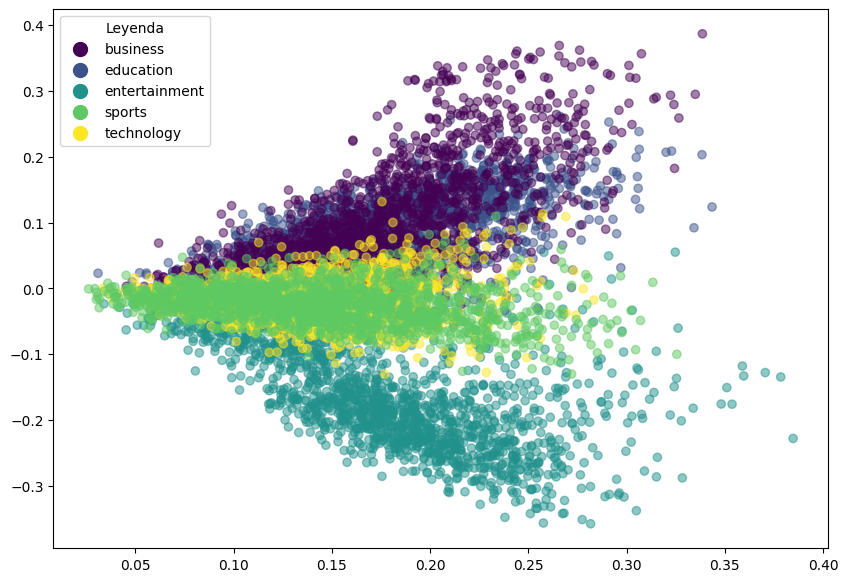

In [46]:
#Veamos gráficamente las componentes 1 y 2.
draw_components(unique_labels, tfidf_df, Y_train, 2)

(8000, 100)
0.20883447897424398


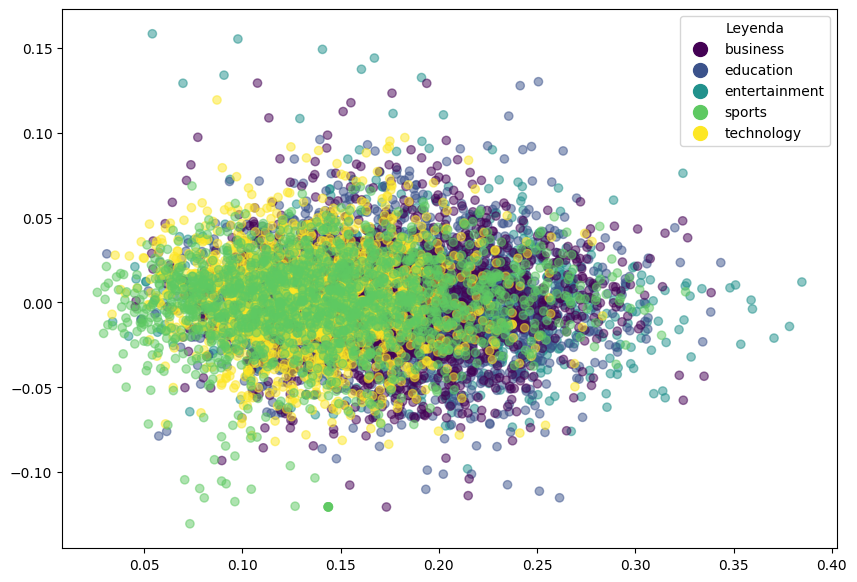

In [47]:
draw_components(unique_labels, tfidf_df, Y_train, 100)

(8000, 500)
0.4265524403272992


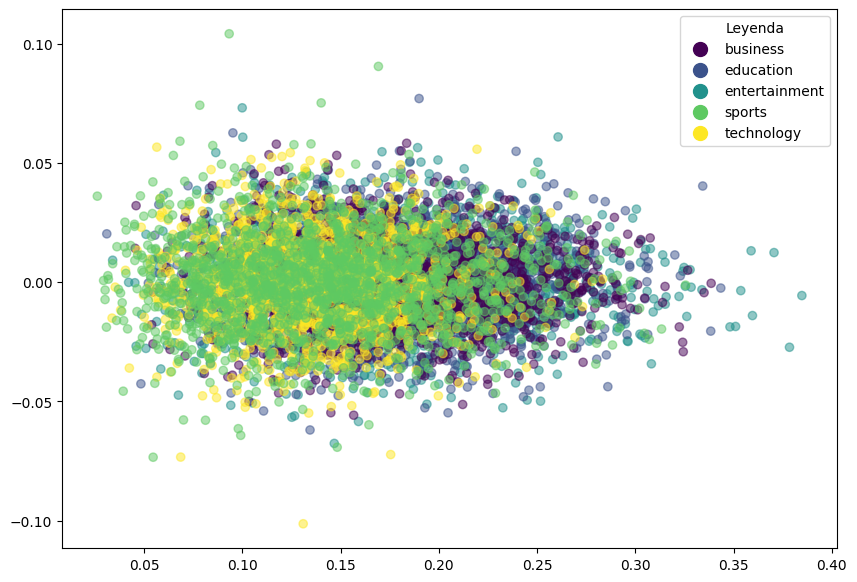

In [48]:
draw_components(unique_labels, tfidf_df, Y_train, 500)

(8000, 2000)
0.7397817924101162


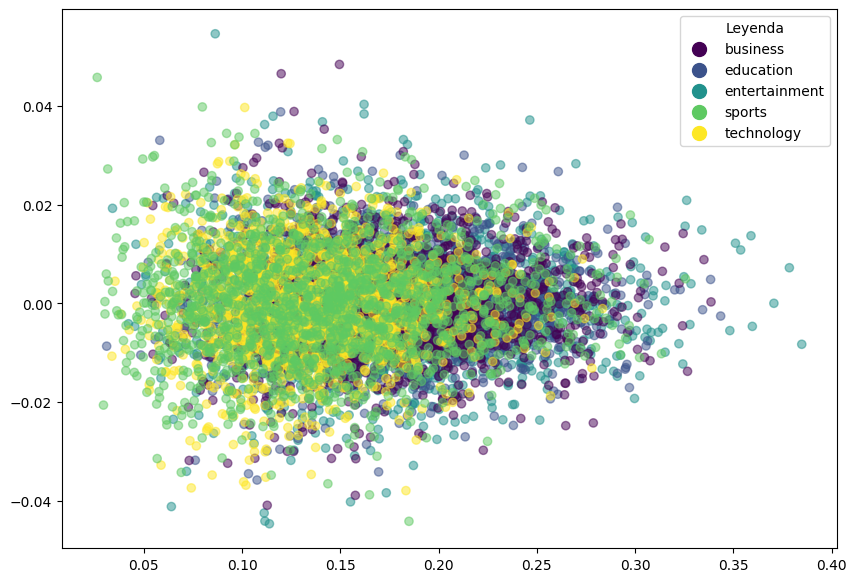

In [49]:
draw_components(unique_labels, tfidf_df, Y_train, 2000)

(8000, 3000)
0.8384314324158069


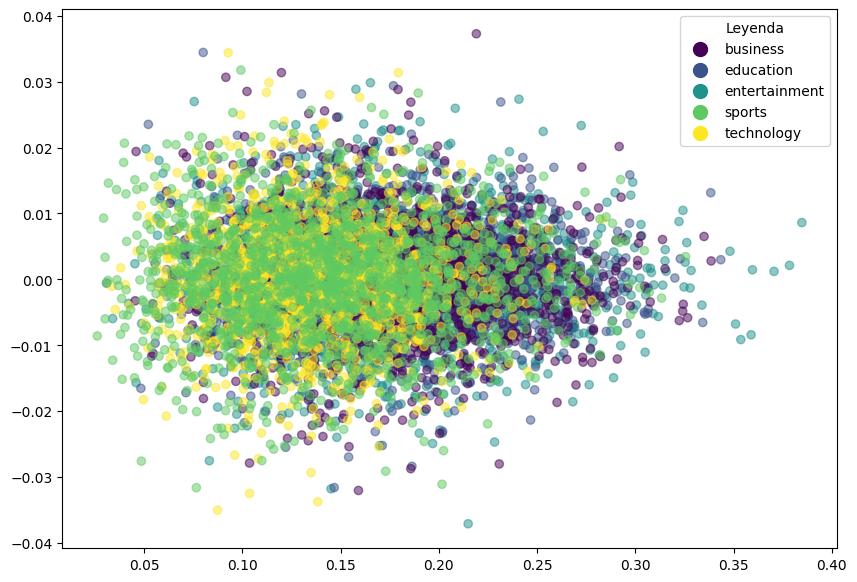

In [50]:
draw_components(unique_labels, tfidf_df, Y_train, 3000)

(8000, 4000)
0.902929715798673


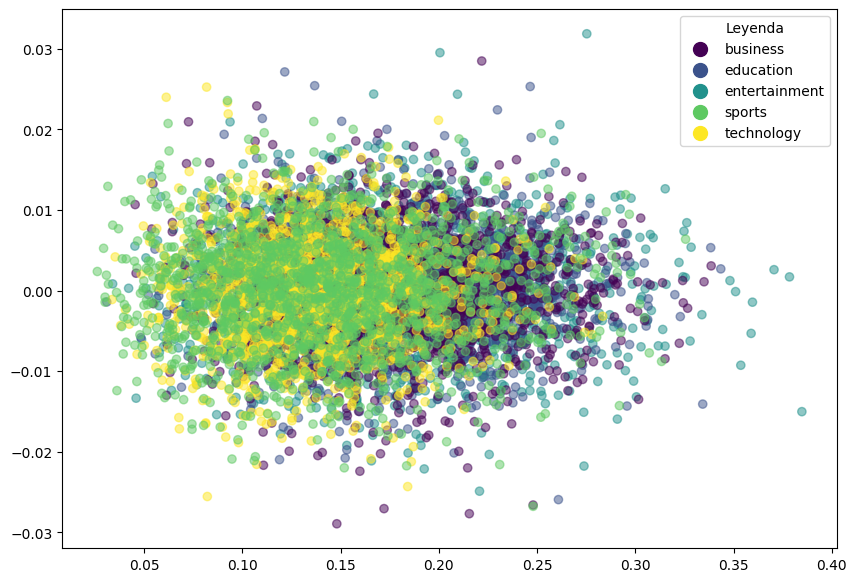

In [51]:
draw_components(unique_labels, tfidf_df, Y_train, 4000)

(8000, 5000)
0.945929726721801


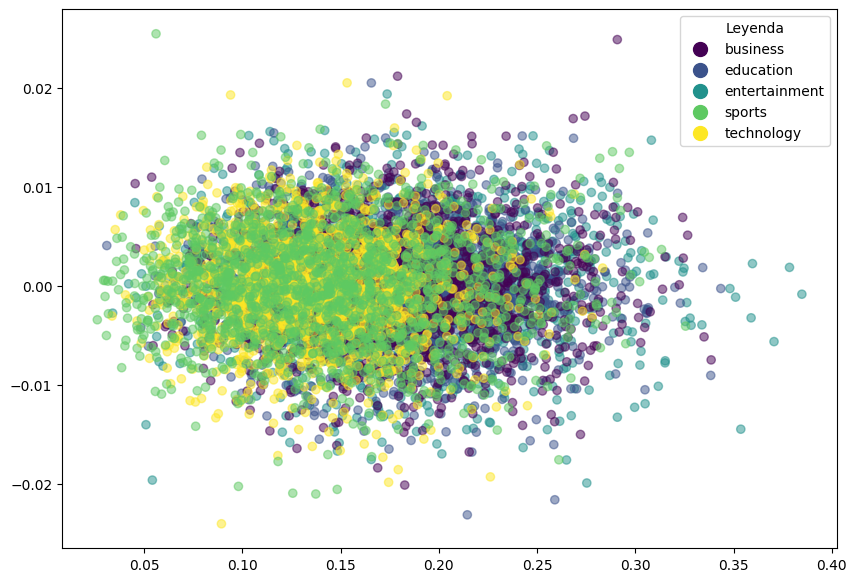

In [52]:
draw_components(unique_labels, tfidf_df, Y_train, 5000)

In [68]:
draw_components(unique_labels, tfidf_df, Y_train, 6000)

(8000, 6000)
0.9741974647433137


Tabla comparativa de la exploración de componentes principales

|Explained Variance|Number of components|
|-------|------|
|0.0161|2|
|0.209|100|
|0.426|500|
|0.7398|2000|
|0.838|3000|
|0.903|4000|
|0.946|5000|
|0.974|6000|

In [70]:
x = [2,100,500,2000,3000,4000,5000, 6000]
y = [0.0161, 0.209, 0.426, 0.7398, 0.838, 0.903, 0.946, 0.974]
plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Número de componentes vs Varianza acumulada explicada')
plt.grid(True)
plt.show()

Se observa que con un mayor número de componentes hay una mayor varianza explicada. En este caso una varianza del 0.94 es suficiente para explicar la mayoría de la información. Por lo que se elige tener una varianza del 0.94 con un número de componentes de 5000.

Se define una clase para preparar los datos:

In [41]:
class TextPreprocessing():
    def __init__(self, stopwords=stopwords.words('english')):
        self.stopwords = stopwords
        self.max_words = 10000
        self.X_pca_fit = None

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def transform(self,X, n_components):
        X_train_new = pd.Series(X)
        X_train_new = X_train_new.apply(contractions.fix)
        X_train_new = X_train_new.apply(word_tokenize)
        X_train_new = X_train_new.apply(lambda x: self.preproccesing(x))
        #X_train_new = X_train_new.apply(lambda x: self.stem_and_lemmatize(x))
        X_train_new = X_train_new.apply(lambda x: self.stem_words(x))
        X_train_new = X_train_new.apply(lambda x: ' '.join(map(str, x)))
        tfidf_vect = TfidfVectorizer(max_features=self.max_words)
        X_tfidf = tfidf_vect.fit_transform(X_train_new)
        pca = TruncatedSVD(n_components)
        self.X_pca_fit = pca.fit_transform(X_tfidf)
        X_pca = self.X_pca_fit
        if X_pca.shape[1] < n_components:
            X_pca = np.concatenate([X_pca, np.zeros((X_pca.shape[0], n_components - X_pca.shape[1]))], axis=1)
        return X_pca 
    

In [42]:
pipeline = TextPreprocessing()

In [43]:
X_train_p = pipeline.transform(X_train, 5000)
print(f"El tamaño es: {X_train_p.shape}")
X_train_p

El tamaño es: (8000, 5000)


array([[ 0.08823837, -0.08533701,  0.02366449, ...,  0.00497502,
         0.00118437,  0.00655156],
       [ 0.22931699, -0.25439177,  0.06335171, ..., -0.0051362 ,
        -0.00355234, -0.00317154],
       [ 0.23481091, -0.12118055,  0.05926437, ...,  0.00120394,
        -0.00355956,  0.00160063],
       ...,
       [ 0.18941553, -0.05945583, -0.04779847, ..., -0.00420863,
        -0.00115324, -0.0037177 ],
       [ 0.06471831, -0.01491825, -0.01859316, ..., -0.00359556,
        -0.00093013,  0.00666541],
       [ 0.12877744, -0.03032282, -0.03702428, ...,  0.00335075,
         0.00244052,  0.00264146]])

In [44]:
X_test_p = pipeline.transform(X_test, 5000)
print(f"El tamaño es: {X_test_p.shape}")
X_test_p

El tamaño es: (2000, 5000)


array([[ 0.31226729, -0.1954536 , -0.1179341 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10982174, -0.05044199, -0.01742644, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18991646, -0.04549589, -0.00477775, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.09439452, -0.03473329,  0.03166346, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06571447, -0.01329904,  0.02299691, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17937963, -0.06188652,  0.05541509, ...,  0.        ,
         0.        ,  0.        ]])

Se define la arquitectura de la red neuronal MLP. Se ven los tamaños de los datos de entrenamiento:

In [45]:
X_train_p.shape

(8000, 5000)

In [46]:
X_test_p.shape

(2000, 5000)

Número de clases:

In [47]:
len(unique_labels)

5

## Punto 3

In [48]:
model = Sequential(name="My_first_NN")

La capa de entrada:

In [49]:
model.add(Dense(128, activation='relu', input_shape=(X_train_p.shape[1],), name="Input_Layer"))
model.summary()

/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "My_first_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       640,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,128 (2.44 MB)

 Trainable params: 640,128 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

Se define una capa oculta

In [50]:
model.add(Dense(64, activation='relu', name="Hidden_Layer"))
model.summary()

Model: "My_first_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,384 (2.47 MB)

 Trainable params: 648,384 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Capa de salida

In [51]:
model.add(Dense(len(unique_labels), activation="softmax", name='Output_Layer'))
model.summary()

Model: "My_first_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,709 (2.47 MB)

 Trainable params: 648,709 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Ya con la arquitectura construida, se compila el modelo definiendo que función de pérdida, optimizador y métrica se va a utilizar para construir el modelo.

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "My_first_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)             │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,709 (2.47 MB)

 Trainable params: 648,709 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Se define un early stopping para verificar el aprendizaje y no esperar a entrenar todas las épocas si el modelo empieza a ver constancia en el aprendizaje

In [53]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [54]:
history = model.fit(X_train_p, Y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=2, callbacks=[early_stopping])

Epoch 1/100
200/200 - 1s - 5ms/step - accuracy: 0.8481 - loss: 0.7098 - val_accuracy: 0.0000e+00 - val_loss: 5.9482
Epoch 2/100
200/200 - 1s - 3ms/step - accuracy: 0.9962 - loss: 0.0196 - val_accuracy: 0.0000e+00 - val_loss: 6.4593
Epoch 3/100
200/200 - 1s - 3ms/step - accuracy: 0.9997 - loss: 0.0050 - val_accuracy: 0.0000e+00 - val_loss: 6.9336
Epoch 4/100
200/200 - 1s - 3ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.0000e+00 - val_loss: 7.1075
Epoch 5/100
200/200 - 1s - 3ms/step - accuracy: 1.0000 - loss: 8.7971e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.2910
Epoch 6/100
200/200 - 1s - 3ms/step - accuracy: 1.0000 - loss: 5.8242e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.4313
Epoch 7/100
200/200 - 1s - 3ms/step - accuracy: 1.0000 - loss: 4.1481e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.5587
Epoch 8/100
200/200 - 1s - 3ms/step - accuracy: 1.0000 - loss: 3.0877e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.6647
Epoch 9/100
200/200 - 1s - 3ms/step - accuracy: 1.0000 -

## Punto 4

Gráfico del comportamiento de la pérdida en el entrenamiento:

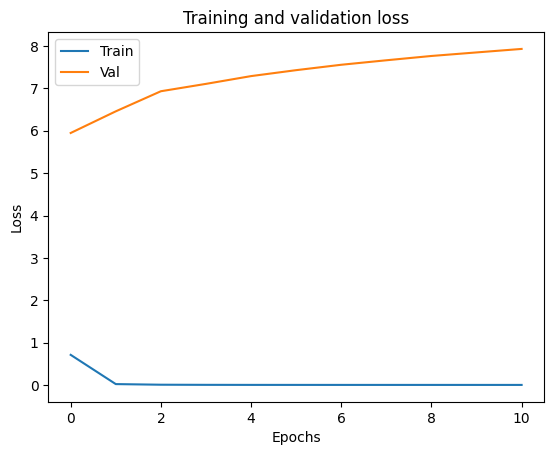

In [55]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Gráfico del comportamiento de la métrica en el entrenamiento:

In [56]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Se verifica la métrica con datos que no conoce la red (test)

In [57]:
model_accuracy = model.evaluate(X_test_p, Y_test)
print("Model Accuracy:", model_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.3368 - loss: 2.8961
Model Accuracy: [3.9146955013275146, 0.2150000035762787]


Se visualiza la matriz de confusión del conjunto de datos train:

               precision    recall  f1-score   support

     business       0.58      0.99      0.74      1600
    education       0.97      1.00      0.98      1600
entertainment       0.84      1.00      0.91      1600
       sports       0.00      0.00      0.00      1600
   technology       0.93      0.99      0.96      1600

     accuracy                           0.80      8000
    macro avg       0.66      0.80      0.72      8000
 weighted avg       0.66      0.80      0.72      8000



/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Pre

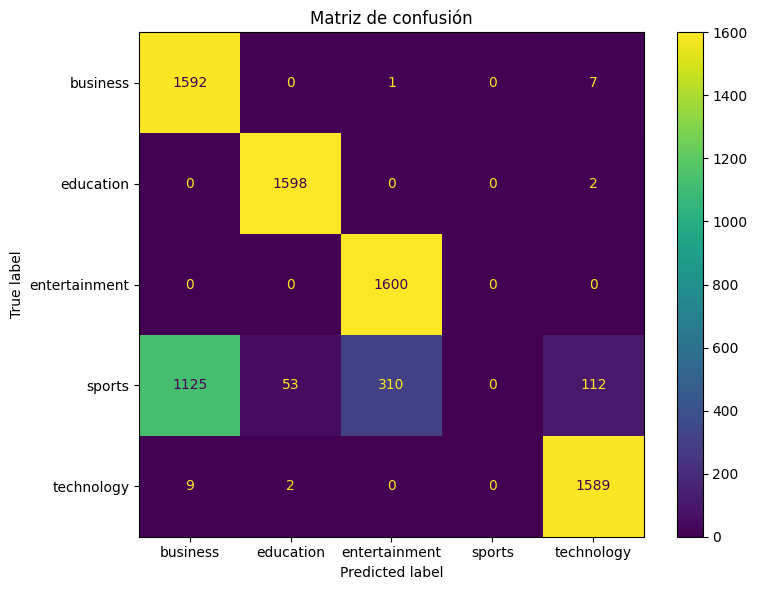

In [58]:
pred = model.predict(X_train_p, verbose=False)
predicted_classes = np.argmax(pred, axis=1)

print(classification_report(Y_train,predicted_classes,target_names=list(unique_labels)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_train, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(unique_labels))

fig, ax = plt.subplots(figsize=(8,6))  
disp.plot(ax=ax)  
plt.title("Matriz de confusión")
plt.tight_layout() 
plt.show()

Se visualiza la matriz de confusión del conjunto de datos test:

               precision    recall  f1-score   support

     business       0.21      0.33      0.26       400
    education       0.02      0.01      0.01       400
entertainment       0.33      0.54      0.41       400
       sports       0.00      0.00      0.00       400
   technology       0.18      0.19      0.19       400

     accuracy                           0.21      2000
    macro avg       0.15      0.22      0.17      2000
 weighted avg       0.15      0.21      0.17      2000



/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Pre

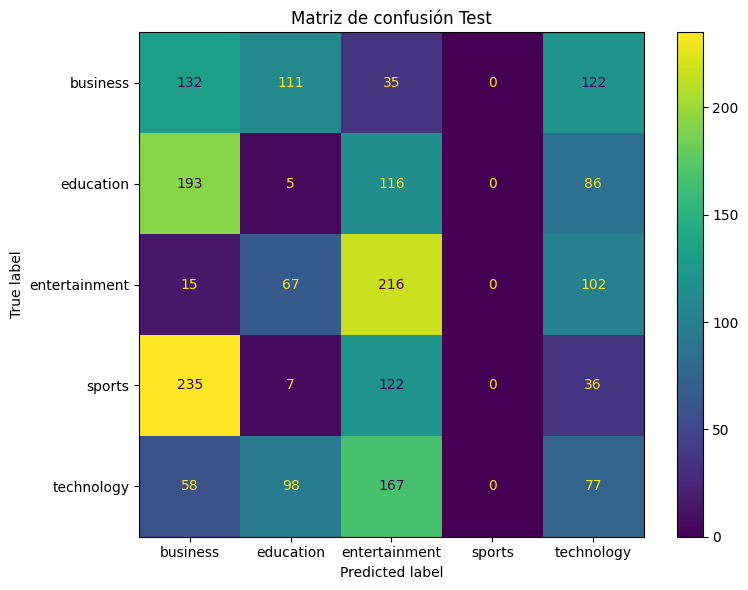

In [59]:
pred_val = model.predict(X_test_p, verbose=False)
predicted_classes_val = np.argmax(pred_val, axis=1)

y_pred_val = predicted_classes_val

print(classification_report(Y_test,y_pred_val,target_names=list(unique_labels)))

cm_val = confusion_matrix(Y_test, y_pred_val)

disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=list(unique_labels))

fig, ax = plt.subplots(figsize=(8,6))
disp_val.plot(ax=ax)

plt.title("Matriz de confusión Test")
plt.tight_layout() 
plt.show()

En general, en el modelo baseline, se observan resultados prometedores para el entrenamiento. Con resultados promedio de un accuracy del 0.8. En este caso, se observan buenos resultados particularmente para las clases de negocio, educación y tecnología. Por otro lado, se observa que se obtiene una baja precisión con la clase de deportes. Con respecto a los resultados de test se observa un overfitting, ya que las métricas se reducen de un 0.8 a un 0.21 aproximadamente. Lo cual indica que el modelo se "aprende" en su mayoría los datos de entrenamiento y a la hora de probar con datos desconocidos ha memorizado "shortcuts" en vez de información relevante que le permita generalizar el modelo. Para ello, unos posibles pasos a futuro sería realizar aumentación de la información y realizar modelos de interpretabilidad como SHAP para saber qué palabras está confundiendo entre clases.

Esto último, se sugiere dado que hay palabras que se repiten entre clases como se puede ver en el bag of words (Word Cloud) de la parte de limpieza de datos. Un mejor algoritmo de vectorización puede ayudar también a reducir el overfitting.

Finalmente, como se puede ver en las gráficas el loss está aumentando en vez de bajar, por lo que una mejor función de regularización loss_function puede ayudar a mejorar los resultados a futuro.

## Punto 5

### Búsqueda de hiperparámetros
Los hiperparámetros que se decidieron explorar fueron: optimizer, activation y batch_size. A continuación, se define cada uno de los parámetros:
- Optimizer: El optimizador es el algoritmo usado para actualizar los pesos de la red neuronal durante el entrenamiento. Algunos optimizadores comunes son SGD (Stochastic Gradient Descent), Adam, RMSProp, Adagrad, entre otros. La elección del optimizador puede tener un impacto significativo en la velocidad de entrenamiento y en la convergencia del modelo a mejores resultados.
- Activation: La función de activación determina la salida de cada neurona en la red. Algunas funciones de activación comunes son ReLU (Rectified Linear Unit), Sigmoid, Tanh, entre otras. La función de activación elegida puede afectar la capacidad de aprendizaje, por lo que se decidió seleccionar este parámetro.
- Batch Size: El batch size se refiere al número de muestras que se pasan a través de la red neuronal antes de que se actualicen los pesos. Un batch size más pequeño puede resultar en una actualización más frecuente de los pesos, pero puede requerir más pasos de entrenamiento. Se espera que para un batch size más grande, el modelo converja más rápido. 

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def model_to_optimize(optimizer, activation):
    model = Sequential(name="NN_Hyperparameter_Tuning")

    model.add(Dense(128, activation=activation, input_shape=(X_train_p.shape[1],), name="Input_Layer"))
    model.add(Dense(64, activation=activation, name="Hidden_Layer"))
    model.add(Dense(len(unique_labels), activation='softmax', name='Output_Layer'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

params = {
    "model__optimizer":["rmsprop","adam","sgd"],
    "model__activation":["leaky_relu", "relu", "sigmoid"],
    "batch_size":[10, 20, 30],
    
}

model = KerasClassifier(build_fn=model_to_optimize,
                            epochs=20,
                            verbose=False)


search = GridSearchCV(estimator=model, param_grid=params,
                              cv=3, verbose=1, scoring="accuracy")
search_result = search.fit(X_train_p, Y_train)




Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/mariacatalinaibanezpineres/Desktop/MAESTRIA/2024-10/Machine Learning/Talleres/Taller3/env/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_f

In [62]:
search_result.best_params_

{'batch_size': 30,
 'model__activation': 'leaky_relu',
 'model__optimizer': 'rmsprop'}

In [71]:
search_result.best_score_

0.9833749682264962

In [63]:
best_estimator = search_result.best_estimator_

In [65]:
test_result = best_estimator.predict(X_test_p)

In [66]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, test_result)
print("Accuracy:", accuracy)

Accuracy: 0.329


### Análisis de los resultados

Luego de realizar el grid_search, se observó que el mejor optimizador fue RMSProp el cual introduce un coeficiente de atenuación. El optimizador RMSProp resuelve el problema de que el optimizador AdaGrad finaliza el proceso de optimización demasiado pronto; ya que, se usa el concepto de 'ventana' para considerar solo los gradientes más recientes.

Por otro lado, la función de activación que obtuvo mejor resultado fue leaky_relu. Esto se puede deber a que esta función tiene un gradiente más suave, lo cual afronta el problema de "vanishing_gradients" que puede ocurrir con ReLU, especialmente durante las primeras etapas del entrenamiento.

Finalmente, el mejor batch size fue de 30 lo cual concuerda con la teoría de que a mayor batch_size se llega más rápido a la optimización esperada.

Después de hacer la búsqueda de hiperparámetros, se observó una mejora considerable en el accuracy. Esta aumentó de 0.21 a 0.329. Por lo que, se podría decir que hacer una búsqueda profunda de hiperparámetros sí influye y es esencial para mejores resultados.